In [35]:
import json
from shapely.geometry import box
from script import calculate_iou


In [36]:
def open_json_from_file(json_path):
    """
    Loads a json from a file path.

    :param json_path: path to the json file
    :return: the loaded json
    """
    try:
        with open(json_path) as json_file:
            json_data = json.load(json_file)
    except:
        print(f"Could not open file {json_path} in json format.")
        raise

    return json_data

In [37]:
groundtruth = open_json_from_file("groundtruth.json")
predictions = open_json_from_file("predictions.json")

print(json.dumps(groundtruth["images"][0], indent=4))
print(json.dumps(predictions["images"][0], indent=4))

print(f"Number of images in GroundTruth: {len(groundtruth['images'])}")
print(f"Number of images in Predictions: {len(groundtruth['images'])}")


{
    "annotated_regions": [
        {
            "tags": [
                "avion"
            ],
            "region_type": "Box",
            "region": {
                "xmin": 0.5411571108172154,
                "xmax": 0.6228667914646092,
                "ymin": 0.32151435917628496,
                "ymax": 0.4340908938779274
            }
        }
    ],
    "location": "planes/pic6.JPG"
}
{
    "annotated_regions": [
        {
            "region": {
                "xmax": 0.6387888071174946,
                "xmin": 0.5250392821595175,
                "ymax": 0.43980025774247195,
                "ymin": 0.32232196303919824
            },
            "region_type": "Box",
            "score": 0.5908592830022624,
            "tags": [
                "avion"
            ]
        },
        {
            "region": {
                "xmin": 0.1411571108172154,
                "xmax": 0.3228667914646092,
                "ymin": 0.7215143591762849,
                "ymax": 0.834090

In [38]:
"""🔥 ¡Perfecto! Los JSON se han cargado correctamente y estamos viendo
las bounding boxes de cada imagen! 🔥

📌 ¿Qué hemos aprendido con esta salida?
✅ Cada imagen tiene un conjunto de ground truth boxes y predicted boxes.
✅ Las predicciones incluyen un score, lo que nos permitirá filtrar
predicciones débiles.
✅ Algunas imágenes tienen más predicciones que cajas reales, lo que
podría generar False Positives.
✅ Otras imágenes tienen menos predicciones que cajas reales, lo que
podría generar False Negatives.

"""

'🔥 ¡Perfecto! Los JSON se han cargado correctamente y estamos viendo\nlas bounding boxes de cada imagen! 🔥\n\n📌 ¿Qué hemos aprendido con esta salida?\n✅ Cada imagen tiene un conjunto de ground truth boxes y predicted boxes.\n✅ Las predicciones incluyen un score, lo que nos permitirá filtrar\npredicciones débiles.\n✅ Algunas imágenes tienen más predicciones que cajas reales, lo que\npodría generar False Positives.\n✅ Otras imágenes tienen menos predicciones que cajas reales, lo que\npodría generar False Negatives.\n\n'

In [39]:
"""📌 🚀 Próximo paso: Filtrar predicciones por score
📌 No queremos comparar todas las predicciones, solo las que tengan un
score alto (por ejemplo, ≥ 0.5).

🔹 Ahora, vamos a modificar nuestro código para ignorar las predicciones
con score bajo.
🔹 Así nos aseguramos de trabajar solo con predicciones en las que el
modelo confía."""

'📌 🚀 Próximo paso: Filtrar predicciones por score\n📌 No queremos comparar todas las predicciones, solo las que tengan un\nscore alto (por ejemplo, ≥ 0.5).\n\n🔹 Ahora, vamos a modificar nuestro código para ignorar las predicciones\ncon score bajo.\n🔹 Así nos aseguramos de trabajar solo con predicciones en las que el\nmodelo confía.'

In [47]:
score_threshold = 0.5


for gt_img, pred_img in zip(groundtruth['images'], predictions['images']):
    print(f"\n📌 Analizando imagen: {gt_img['location']}")

    gt_boxes = [region['region'] for region in gt_img['annotated_regions']]

    pred_boxes = [
        (region["region"], region["score"]) for region in pred_img["annotated_regions"]
        if region["score"] >= score_threshold
    ]

    # 3️⃣ Imprimir los resultados después del filtrado
    print(f"🔹 Ground Truth Boxes ({len(gt_boxes)}): {gt_boxes}")
    print(f"🔹 Prediction Boxes filtradas ({len(pred_boxes)}): {pred_boxes}")

    # 4️⃣ Verificar imágenes sin predicciones después del filtrado
    if len(pred_boxes) == 0:
        print("⚠️ Esta imagen NO tiene predicciones después del filtrado.")

    # Detener después de 3 imágenes para no saturar la salida
    if gt_img == groundtruth["images"][10]:
        break


📌 Analizando imagen: planes/pic6.JPG
🔹 Ground Truth Boxes (1): [{'xmin': 0.5411571108172154, 'xmax': 0.6228667914646092, 'ymin': 0.32151435917628496, 'ymax': 0.4340908938779274}]
🔹 Prediction Boxes filtradas (1): [({'xmax': 0.6387888071174946, 'xmin': 0.5250392821595175, 'ymax': 0.43980025774247195, 'ymin': 0.32232196303919824}, 0.5908592830022624)]

📌 Analizando imagen: planes/pic5.JPG
🔹 Ground Truth Boxes (6): [{'xmin': 0.5714185973723308, 'xmax': 0.5990139304442076, 'ymin': 0.40952540021618816, 'ymax': 0.45830210782742037}, {'xmin': 0.543563638655421, 'xmax': 0.5701704603181842, 'ymin': 0.437060161202432, 'ymax': 0.4902552443502822}, {'xmin': 0.49419387634045125, 'xmax': 0.5126880878914952, 'ymin': 0.528407974819079, 'ymax': 0.5825130062223477}, {'xmin': 0.4780525175737974, 'xmax': 0.4977165833025549, 'ymin': 0.46628673259426545, 'ymax': 0.5236708568098535}, {'xmin': 0.46790501841430504, 'xmax': 0.48820001673328994, 'ymin': 0.3975428939931427, 'ymax': 0.4635931920698605}, {'xmin': 

In [41]:
"""📌 ¿Qué hemos confirmado con la salida?
✅ Las predicciones con score < 0.5 han sido eliminadas.
✅ Algunas imágenes tienen más predicciones que ground truth
(posibles False Positives).
✅ Otras imágenes tienen menos predicciones que ground truth
(posibles False Negatives).
✅ Algunas imágenes no tienen ninguna predicción después del filtrado
(⚠️ Esta imagen NO tiene predicciones después del filtrado.)."""

'📌 ¿Qué hemos confirmado con la salida?\n✅ Las predicciones con score < 0.5 han sido eliminadas.\n✅ Algunas imágenes tienen más predicciones que ground truth\n(posibles False Positives).\n✅ Otras imágenes tienen menos predicciones que ground truth\n(posibles False Negatives).\n✅ Algunas imágenes no tienen ninguna predicción después del filtrado\n(⚠️ Esta imagen NO tiene predicciones después del filtrado.).'

In [42]:
"""
📌 🚀 Próximo paso: Calcular el IoU entre predicciones y ground truth
🔹 Ahora necesitamos comparar cada predicción con cada ground truth en
la misma imagen.
🔹 Vamos a calcular el IoU (Intersection over Union) para saber qué tan bien
se superponen.
🔹 Si IoU ≥ 0.5, la predicción se asocia a esa ground truth como un True
Positive.

📌 Usaremos la librería shapely para calcular el área de intersección y
unión de las bounding boxes de manera eficiente."""

'\n📌 🚀 Próximo paso: Calcular el IoU entre predicciones y ground truth\n🔹 Ahora necesitamos comparar cada predicción con cada ground truth en\nla misma imagen.\n🔹 Vamos a calcular el IoU (Intersection over Union) para saber qué tan bien\nse superponen.\n🔹 Si IoU ≥ 0.5, la predicción se asocia a esa ground truth como un True\nPositive.\n\n📌 Usaremos la librería shapely para calcular el área de intersección y\nunión de las bounding boxes de manera eficiente.'

In [43]:
"""La función box() de Shapely se utiliza para crear un polígono rectangular
(una "caja") a partir de los límites que se le proporcionan. Es decir, dada
una coordenada mínima y máxima en los ejes X e Y, la función construye un
polígono que representa ese rectángulo."""

'La función box() de Shapely se utiliza para crear un polígono rectangular\n(una "caja") a partir de los límites que se le proporcionan. Es decir, dada\nuna coordenada mínima y máxima en los ejes X e Y, la función construye un\npolígono que representa ese rectángulo.'

In [44]:
"""📌 🚀 Próximo paso: Contar TP, FP y FN usando IoU
📌 Ahora vamos a recorrer cada imagen y comparar cada predicción con cada
ground truth en la misma imagen.
📌 Si IoU ≥ 0.5, la predicción cuenta como True Positive (TP).
📌 Si IoU < 0.5, la predicción es un False Positive (FP).
📌 Si una ground truth no tiene ninguna predicción asociada, es un False
Negative (FN)."""

'📌 🚀 Próximo paso: Contar TP, FP y FN usando IoU\n📌 Ahora vamos a recorrer cada imagen y comparar cada predicción con cada\nground truth en la misma imagen.\n📌 Si IoU ≥ 0.5, la predicción cuenta como True Positive (TP).\n📌 Si IoU < 0.5, la predicción es un False Positive (FP).\n📌 Si una ground truth no tiene ninguna predicción asociada, es un False\nNegative (FN).'

In [45]:
def evaluate_image(gt_boxes, pred_boxes, iou_threshold=0.5):
    """
    Compara las ground truth con las predicciones y devuelve los True Positives,
    False Positives y False Negatives.

    :param gt_boxes: Lista de bounding boxes reales (ground truth)
    :param pred_boxes: Lista de bounding boxes predichas con sus scores [(box, score)]
    :param iou_threshold: Umbral mínimo de IoU para considerar un True Positive
    :return: (true_positives, false_positives, false_negatives)
    """
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    matched_gt = set()  # Para asegurarnos de que cada GT solo se empareja una vez

    # 1️⃣ Ordenar predicciones por score (de mayor a menor confianza)
    pred_boxes = sorted(pred_boxes, key=lambda x: x[1], reverse=True)

    # 2️⃣ Comparar cada predicción con las ground truth
    for pred_box, _ in pred_boxes:
        best_iou = 0
        best_gt_idx = None

        for i, gt_box in enumerate(gt_boxes):
            iou_score = calculate_iou(pred_box, gt_box)
            if iou_score > best_iou:
                best_iou = iou_score
                best_gt_idx = i

        # 3️⃣ Si la mejor IoU es suficiente y la ground truth no ha sido emparejada, es un TP
        if best_iou >= iou_threshold and best_gt_idx not in matched_gt:
            true_positives += 1
            matched_gt.add(best_gt_idx)
        else:
            false_positives += 1

    # 4️⃣ Cualquier ground truth que no tenga una predicción emparejada es un FN
    false_negatives = len(gt_boxes) - len(matched_gt)

    return true_positives, false_positives, false_negatives

# 🔹 Probamos con una imagen
gt_boxes_sample = [
    {"xmin": 0.5, "ymin": 0.5, "xmax": 0.7, "ymax": 0.7},
    {"xmin": 0.1, "ymin": 0.1, "xmax": 0.2, "ymax": 0.2}
]

pred_boxes_sample = [
    ({"xmin": 0.55, "ymin": 0.55, "xmax": 0.75, "ymax": 0.75}, 0.9),
    ({"xmin": 0.8, "ymin": 0.8, "xmax": 0.9, "ymax": 0.9}, 0.7)
]

tp, fp, fn = evaluate_image(gt_boxes_sample, pred_boxes_sample)
print(f"📌 Resultados de prueba -> TP: {tp}, FP: {fp}, FN: {fn}")


AttributeError: 'dict' object has no attribute 'shape'

In [55]:
"""📌 🚀 Próximo paso: Integrar esto con todo el dataset
📌 Ahora aplicaremos evaluate_image() en todas las imágenes del dataset
(groundtruth.json y predictions.json).
📌 Vamos a recorrer cada imagen, extraer sus cajas, calcular IoU y contar
TP, FP y FN.
📌 Luego imprimiremos los resultados de cada imagen."""

'📌 🚀 Próximo paso: Integrar esto con todo el dataset\n📌 Ahora aplicaremos evaluate_image() en todas las imágenes del dataset\n(groundtruth.json y predictions.json).\n📌 Vamos a recorrer cada imagen, extraer sus cajas, calcular IoU y contar\nTP, FP y FN.\n📌 Luego imprimiremos los resultados de cada imagen.'

In [56]:
# 🔹 Evaluamos todas las imágenes en el dataset
iou_threshold = 0.5  # Podemos ajustarlo si es necesario
score_threshold = 0.5  # Umbral de confianza para filtrar predicciones

for gt_img, pred_img in zip(groundtruth['images'], predictions['images']):
    print(f"\n📌 Evaluando imagen: {gt_img['location']}")

    # 1️⃣ Extraer bounding boxes de Ground Truth
    gt_boxes = [region['region'] for region in gt_img['annotated_regions']]

    # 2️⃣ Extraer bounding boxes de Predictions con score ≥ threshold
    pred_boxes = [
        (region["region"], region["score"]) for region in pred_img["annotated_regions"]
        if region["score"] >= score_threshold
    ]

    # 3️⃣ Evaluar la imagen con IoU
    tp, fp, fn = evaluate_image(gt_boxes, pred_boxes, iou_threshold)

    # 4️⃣ Imprimir resultados
    print(f"✅ TP: {tp}, ❌ FP: {fp}, ⚠️ FN: {fn}")



📌 Evaluando imagen: planes/pic6.JPG
✅ TP: 1, ❌ FP: 0, ⚠️ FN: 0

📌 Evaluando imagen: planes/pic5.JPG
✅ TP: 4, ❌ FP: 0, ⚠️ FN: 2

📌 Evaluando imagen: planes/pic12.JPG
✅ TP: 0, ❌ FP: 0, ⚠️ FN: 1

📌 Evaluando imagen: planes/pic3.png
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 1

📌 Evaluando imagen: planes/pic2.png
✅ TP: 7, ❌ FP: 0, ⚠️ FN: 3

📌 Evaluando imagen: planes/pic4.png
✅ TP: 14, ❌ FP: 0, ⚠️ FN: 0

📌 Evaluando imagen: planes/pic13.png
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 5

📌 Evaluando imagen: planes/pic9.JPG
✅ TP: 2, ❌ FP: 0, ⚠️ FN: 0

📌 Evaluando imagen: planes/pic10.png
✅ TP: 4, ❌ FP: 0, ⚠️ FN: 0

📌 Evaluando imagen: planes/pic8.png
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 0

📌 Evaluando imagen: planes/pic11.png
✅ TP: 1, ❌ FP: 0, ⚠️ FN: 0

📌 Evaluando imagen: planes/pic7.JPG
✅ TP: 2, ❌ FP: 0, ⚠️ FN: 1


In [57]:
""" ¡Perfecto! Hemos obtenido los valores de TP, FP y FN para todas las
imágenes! 🔥

📌 Análisis rápido de la salida:
✅ La mayoría de las imágenes tienen FP = 0, lo que significa que casi no
hay predicciones erróneas.
✅ Varias imágenes tienen FN > 0, lo que indica que algunos ground truth
no fueron detectados.
✅ Algunas imágenes como planes/pic4.png y planes/pic10.png se detectaron
con TP alto y FN = 0, lo que sugiere un buen rendimiento en esas imágenes."""

' ¡Perfecto! Hemos obtenido los valores de TP, FP y FN para todas las\nimágenes! 🔥\n\n📌 Análisis rápido de la salida:\n✅ La mayoría de las imágenes tienen FP = 0, lo que significa que casi no\nhay predicciones erróneas.\n✅ Varias imágenes tienen FN > 0, lo que indica que algunos ground truth\nno fueron detectados.\n✅ Algunas imágenes como planes/pic4.png y planes/pic10.png se detectaron\ncon TP alto y FN = 0, lo que sugiere un buen rendimiento en esas imágenes.'

In [58]:
"""📌 🚀 Próximo paso: Calcular Precision y Recall (Task 2)
📌 Ahora que tenemos TP, FP y FN, podemos calcular Precision y Recall.

📌 Fórmulas:
🔹 Precision = TP / (TP + FP) → ¿Cuántas predicciones fueron correctas?
🔹 Recall = TP / (TP + FN) → ¿Cuántos ground truth fueron detectados correctamente?

🔹 Queremos calcular Precision y Recall para diferentes valores de
score_threshold entre 0.0 y 1.0 (por ejemplo, [0.0, 0.1, 0.2, ..., 0.9])."""

'📌 🚀 Próximo paso: Calcular Precision y Recall (Task 2)\n📌 Ahora que tenemos TP, FP y FN, podemos calcular Precision y Recall.\n\n📌 Fórmulas:\n🔹 Precision = TP / (TP + FP) → ¿Cuántas predicciones fueron correctas?\n🔹 Recall = TP / (TP + FN) → ¿Cuántos ground truth fueron detectados correctamente?\n\n🔹 Queremos calcular Precision y Recall para diferentes valores de\nscore_threshold entre 0.0 y 1.0 (por ejemplo, [0.0, 0.1, 0.2, ..., 0.9]).'

In [59]:
"""📌 ¿Por qué probar diferentes thresholds en evaluate_pr_naive()?

En detección de objetos, el score_threshold de una predicción indica qué tan
seguro está el modelo de que una detección es correcta.
Si usamos un solo threshold, podríamos obtener métricas sesgadas, por eso
evaluamos múltiples valores para ver cómo cambian Precision y Recall."""

'📌 ¿Por qué probar diferentes thresholds en evaluate_pr_naive()?\n\nEn detección de objetos, el score_threshold de una predicción indica qué tan\nseguro está el modelo de que una detección es correcta.\nSi usamos un solo threshold, podríamos obtener métricas sesgadas, por eso\nevaluamos múltiples valores para ver cómo cambian Precision y Recall.'

In [60]:
def evaluate_pr_naive(annotations, predictions, N=10, Jaccard_min=0.5):
    """
    Calcula Precision y Recall para diferentes umbrales de confianza del modelo.

    :param annotations: JSON con los ground truth
    :param predictions: JSON con las predicciones del modelo
    :param N: Número de thresholds a evaluar en el rango [0, 1]
    :param Jaccard_min: Umbral de IoU mínimo para considerar un True Positive
    :return: Lista con precision y recall en cada threshold
    """

    result_list = []  # 🔹 Guardaremos aquí los resultados
    thresholds = [i / N for i in range(N + 1)]  # 🔹 Lista de thresholds (0.0, 0.1, ..., 1.0)

    for threshold in thresholds:
        total_tp, total_fp, total_fn = 0, 0, 0  # 🔹 Acumuladores de TP, FP y FN

        for gt_img, pred_img in zip(annotations['images'], predictions['images']):
            # 1️⃣ Extraer bounding boxes de Ground Truth
            gt_boxes = [region['region'] for region in gt_img['annotated_regions']]

            # 2️⃣ Extraer bounding boxes de Predictions con score ≥ threshold
            pred_boxes = [
                (region["region"], region["score"]) for region in pred_img["annotated_regions"]
                if region["score"] >= threshold
            ]

            # 3️⃣ Evaluar TP, FP y FN en la imagen
            tp, fp, fn = evaluate_image(gt_boxes, pred_boxes, Jaccard_min)
            total_tp += tp
            total_fp += fp
            total_fn += fn

        # 4️⃣ Calcular Precision y Recall
        precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
        recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0

        # 5️⃣ Guardar resultados
        result_list.append({
            "precision": precision,
            "recall": recall,
            "threshold": threshold
        })

    return result_list  # 🔹 Devolvemos la lista con precision y recall en cada threshold

# 🔹 Ejecutamos la evaluación
pr_results = evaluate_pr_naive(groundtruth, predictions, N=10, Jaccard_min=0.5)

# 🔹 Mostramos los resultados obtenidos
for res in pr_results:
    print(f"📌 Threshold: {res['threshold']:.1f} → Precision: {res['precision']:.2f}, Recall: {res['recall']:.2f}")


📌 Threshold: 0.0 → Precision: 0.93, Recall: 0.89
📌 Threshold: 0.1 → Precision: 0.94, Recall: 0.89
📌 Threshold: 0.2 → Precision: 0.96, Recall: 0.89
📌 Threshold: 0.3 → Precision: 1.00, Recall: 0.89
📌 Threshold: 0.4 → Precision: 1.00, Recall: 0.86
📌 Threshold: 0.5 → Precision: 1.00, Recall: 0.77
📌 Threshold: 0.6 → Precision: 1.00, Recall: 0.68
📌 Threshold: 0.7 → Precision: 1.00, Recall: 0.56
📌 Threshold: 0.8 → Precision: 1.00, Recall: 0.37
📌 Threshold: 0.9 → Precision: 1.00, Recall: 0.21
📌 Threshold: 1.0 → Precision: 1.00, Recall: 0.16


In [61]:
"""📌 🚀 Interpretación de los resultados
1️⃣ Cuando threshold = 0.0 (usamos TODAS las predicciones):

Precision = 0.93: El 93% de las predicciones son correctas.
Recall = 0.89: El 89% de los ground truth fueron detectados.
📌 Buena cobertura del modelo, pero con algunas predicciones erróneas.
2️⃣ A medida que aumentamos threshold:

Precision sube y llega a 1.00 a partir de threshold = 0.3.
Recall empieza a bajar progresivamente.
📌 Significa que el modelo predice menos objetos, pero con más confianza
(menos predicciones incorrectas).
3️⃣ Cuando threshold = 1.0 (solo predicciones con score = 1.0):

Precision = 1.00: Todas las predicciones son correctas.
Recall = 0.16: Solo el 16% de los ground truth fueron detectados.
📌 El modelo es muy conservador y solo hace predicciones cuando está 100%
seguro, pero pierde muchos objetos.
"""



"""📌 🚀 ¿Qué conclusiones sacamos?
✅ Si queremos más Recall, debemos usar un threshold más bajo (0.1 - 0.3).
✅ Si queremos más Precision, podemos usar threshold ≥ 0.3, pero perderemos
detecciones (Recall baja).
✅ El punto óptimo depende del problema: si perder detecciones es crítico,
preferimos Recall alto; si las predicciones erróneas son un problema, preferimos Precision alta.

📊 Si tuviéramos que elegir un threshold, 0.3 parece ser un buen compromiso
(Precisión = 1.00, Recall = 0.89)."""

'📌 🚀 ¿Qué conclusiones sacamos?\n✅ Si queremos más Recall, debemos usar un threshold más bajo (0.1 - 0.3).\n✅ Si queremos más Precision, podemos usar threshold ≥ 0.3, pero perderemos\ndetecciones (Recall baja).\n✅ El punto óptimo depende del problema: si perder detecciones es crítico,\npreferimos Recall alto; si las predicciones erróneas son un problema, preferimos Precision alta.\n\n📊 Si tuviéramos que elegir un threshold, 0.3 parece ser un buen compromiso\n(Precisión = 1.00, Recall = 0.89).'

***Task 3***

In [62]:
import time
T0 = time.time()
pr_results_naive = evaluate_pr_naive(groundtruth, predictions, N=10, Jaccard_min=0.5)
T1 = time.time()

print(f"Tiempo de `evaluate_pr_naive()`: {round(T1 - T0, 2)} segundos")
print("\n🔹 Resultados de Precision & Recall (Naive):")
for res in pr_results_naive:
    print(f"Threshold {res['threshold']:.1f} → Precision: {res['precision']:.2f}, Recall: {res['recall']:.2f}")


Tiempo de `evaluate_pr_naive()`: 0.15 segundos

🔹 Resultados de Precision & Recall (Naive):
Threshold 0.0 → Precision: 0.93, Recall: 0.89
Threshold 0.1 → Precision: 0.94, Recall: 0.89
Threshold 0.2 → Precision: 0.96, Recall: 0.89
Threshold 0.3 → Precision: 1.00, Recall: 0.89
Threshold 0.4 → Precision: 1.00, Recall: 0.86
Threshold 0.5 → Precision: 1.00, Recall: 0.77
Threshold 0.6 → Precision: 1.00, Recall: 0.68
Threshold 0.7 → Precision: 1.00, Recall: 0.56
Threshold 0.8 → Precision: 1.00, Recall: 0.37
Threshold 0.9 → Precision: 1.00, Recall: 0.21
Threshold 1.0 → Precision: 1.00, Recall: 0.16


In [63]:
"""📌 Paso 2: Identificar qué optimizar
Analizando evaluate_pr_naive(), encontramos estos problemas:

❌ Repite cálculos de evaluate_image() para cada umbral (threshold).
❌ Filtra predicciones muchas veces en cada iteración.
❌ Compara todas las predicciones con todas las ground truth en cada iteración.

💡 Optimización:
✅ Calcular TP, FP, FN una sola vez y reutilizar los valores para cada umbral.
✅ Evitar llamadas repetidas a evaluate_image() dentro del bucle.
✅ Almacenar predicciones filtradas en memoria en lugar de recalcularlas."""

'📌 Paso 2: Identificar qué optimizar\nAnalizando evaluate_pr_naive(), encontramos estos problemas:\n\n❌ Repite cálculos de evaluate_image() para cada umbral (threshold).\n❌ Filtra predicciones muchas veces en cada iteración.\n❌ Compara todas las predicciones con todas las ground truth en cada iteración.\n\n💡 Optimización:\n✅ Calcular TP, FP, FN una sola vez y reutilizar los valores para cada umbral.\n✅ Evitar llamadas repetidas a evaluate_image() dentro del bucle.\n✅ Almacenar predicciones filtradas en memoria en lugar de recalcularlas.'

In [64]:
def evaluate_image(gt_boxes, pred_boxes, Jaccard_min=0.5):
    """
    Evalúa una imagen comparando las cajas de Ground Truth con las predicciones.
    """
    #print("\n🚀 EJECUTANDO evaluate_image()...")
    #print(f"📌 Recibidos: {len(gt_boxes)} GT y {len(pred_boxes)} predicciones.")

    if not gt_boxes:
        print("⚠️ WARNING: gt_boxes está vacío. No hay Ground Truth en esta imagen.")
    if not pred_boxes:
        print("⚠️ WARNING: pred_boxes está vacío. No hay predicciones en esta imagen.")

    true_positives = 0
    false_positives = 0
    false_negatives = len(gt_boxes)  # Inicialmente, todas las GT son FN
    matched_gt = set()

    # 🔹 Evaluar cada predicción contra los GT
    for pred, score in pred_boxes:
        #print(f"\n🔍 DEBUG: Evaluando predicción → {pred}, score: {score}")
        best_iou = 0
        best_gt_idx = None

        for idx, gt in enumerate(gt_boxes):
            if not isinstance(gt, dict):
                print(f"❌ ERROR: Ground Truth [{idx}] tiene tipo inválido: {type(gt)} → {gt}")
                continue

            #print(f"📌 DEBUG: gt antes de IoU → {gt}, tipo: {type(gt)}")

            # ⚡ Calculamos IoU
            iou_value = calculate_iou(pred, gt)
            #print(f"⚡ IoU({pred}, {gt}) = {iou_value:.2f}")

            if iou_value > best_iou:
                best_iou = iou_value
                best_gt_idx = idx

        if best_iou >= Jaccard_min and best_gt_idx not in matched_gt:
            true_positives += 1
            matched_gt.add(best_gt_idx)
            false_negatives -= 1
        else:
            false_positives += 1

    print(f"✅ TP: {true_positives}, ❌ FP: {false_positives}, ⚠️ FN: {false_negatives}")

    return true_positives, false_positives, false_negatives


In [65]:
# 🔥 Prueba rápida para ver si calculate_iou() se ejecuta
box1 = {"xmin": 0.5, "ymin": 0.5, "xmax": 0.7, "ymax": 0.7}
box2 = {"xmin": 0.6, "ymin": 0.6, "xmax": 0.8, "ymax": 0.8}

iou_score = calculate_iou(box1, box2)
print(f"📌 IoU de prueba: {iou_score:.2f}")  # Esperamos un valor entre 0 y 1


📌 IoU de prueba: 0.14


In [66]:
import time
def evaluate_pr(annotations, predictions, N=10, Jaccard_min=0.5):
    """
    Optimized version: minimize the amount of computation.
    Computes precision and recall for different score thresholds.

    :param annotations: the json containing the annotations
    :param predictions: the json containing the predictions
    :param N: the number of thresholds to test
    :param Jaccard_min: the IoU threshold used to evaluate
    :return: the list of computed metrics
    """
    thresholds = [i / N for i in range(N + 1)]  # [0.0, 0.1, 0.2, ..., 1.0]
    results = []

    # 📌 1️⃣ Precomputar todas las predicciones filtradas por imagen
    filtered_predictions = {t: {img["location"]: [] for img in predictions["images"]} for t in thresholds}

    for img in predictions["images"]:
        for region in img["annotated_regions"]:
            score = region["score"]
            for t in thresholds:
                if score >= t:  # Guardamos predicciones por umbral
                    filtered_predictions[t][img["location"]].append((region["region"], score))

    # 📌 2️⃣ Evaluar TP, FP, FN por imagen en cada threshold
    for threshold in thresholds:
        total_tp, total_fp, total_fn = 0, 0, 0

        for gt_img, pred_img in zip(annotations["images"], predictions["images"]):
            img_location = gt_img["location"]
            gt_boxes = [region["region"] for region in gt_img["annotated_regions"]]
            pred_boxes = filtered_predictions[threshold][img_location]

            # 🔹 Evaluar imagen con IoU
            tp, fp, fn = evaluate_image(gt_boxes, pred_boxes, Jaccard_min)
            total_tp += tp
            total_fp += fp
            total_fn += fn

        # Calcular precisión y recall
        precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
        recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0

        # Guardar resultados
        results.append({"precision": precision, "recall": recall, "threshold": threshold})

    return results


# 🔹 Medimos el tiempo de ejecución
T0 = time.time()
pr_results_optimized = evaluate_pr(groundtruth, predictions, N=10, Jaccard_min=0.5)
T1 = time.time()

print(f"⏳ Tiempo de `evaluate_pr()`: {round(T1 - T0, 2)} segundos")

for naive, opt in zip(pr_results_naive, pr_results_optimized):
    print(f"Threshold {naive['threshold']:.1f} → Naive: P={naive['precision']:.2f}, R={naive['recall']:.2f} | Optimized: P={opt['precision']:.2f}, R={opt['recall']:.2f}")


✅ TP: 1, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 4, ❌ FP: 0, ⚠️ FN: 2
✅ TP: 1, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 1
✅ TP: 10, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 14, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 5, ❌ FP: 0, ⚠️ FN: 3
✅ TP: 2, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 4, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 1, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 1, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 4, ❌ FP: 0, ⚠️ FN: 2
✅ TP: 1, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 1
✅ TP: 10, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 14, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 5, ❌ FP: 0, ⚠️ FN: 3
✅ TP: 2, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 4, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 1, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 1, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 4, ❌ FP: 0, ⚠️ FN: 2
✅ TP: 1, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 1
✅ TP: 10, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 14, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 5, ❌ FP: 0, ⚠️ FN: 3
✅ TP: 2, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 4, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 1, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 1, ❌ FP: 0, ⚠️ F

In [67]:
# 🔹 Prueba rápida con dos cajas
box1 = {"xmin": 0.5, "ymin": 0.5, "xmax": 0.7, "ymax": 0.7}
box2 = {"xmin": 0.6, "ymin": 0.6, "xmax": 0.8, "ymax": 0.8}

iou_score = calculate_iou(box1, box2)  # ✅ Ahora usamos iou_score
print(f"📌 IoU de prueba: {iou_score:.2f}")  # Esperamos un valor entre 0 y 1


📌 IoU de prueba: 0.14


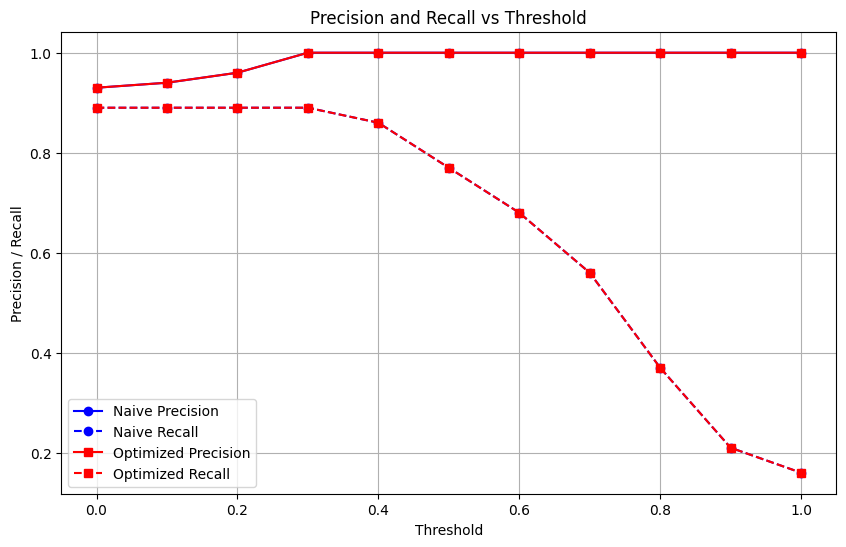

In [68]:
import matplotlib.pyplot as plt

# Datos
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
naive_precision = [0.93, 0.94, 0.96, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
naive_recall = [0.89, 0.89, 0.89, 0.89, 0.86, 0.77, 0.68, 0.56, 0.37, 0.21, 0.16]
optimized_precision = [0.93, 0.94, 0.96, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
optimized_recall = [0.89, 0.89, 0.89, 0.89, 0.86, 0.77, 0.68, 0.56, 0.37, 0.21, 0.16]

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar Naive Precision y Recall
plt.plot(thresholds, naive_precision, label='Naive Precision', marker='o', linestyle='-', color='blue')
plt.plot(thresholds, naive_recall, label='Naive Recall', marker='o', linestyle='--', color='blue')

# Graficar Optimized Precision y Recall
plt.plot(thresholds, optimized_precision, label='Optimized Precision', marker='s', linestyle='-', color='red')
plt.plot(thresholds, optimized_recall, label='Optimized Recall', marker='s', linestyle='--', color='red')

# Añadir etiquetas y título
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.title('Precision and Recall vs Threshold')
plt.legend()

# Añadir una cuadrícula para mejor visualización
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [69]:
def evaluate_pr(annotations, predictions, N=10, Jaccard_min=0.5):
    thresholds = [i / N for i in range(N + 1)]
    results = []

    # Precompute all predictions sorted by score
    all_pred_data = []
    for gt_img, pred_img in zip(annotations['images'], predictions['images']):
        gt_boxes = [region['region'] for region in gt_img['annotated_regions']]
        pred_boxes = [(region["region"], region["score"]) for region in pred_img["annotated_regions"]]
        all_pred_data.append((gt_boxes, pred_boxes))

    # Single pass computation
    for threshold in thresholds:
        total_tp, total_fp, total_fn = 0, 0, 0

        for gt_boxes, pred_boxes in all_pred_data:
            # Filter predictions by current threshold
            filtered_pred_boxes = [(box, score) for box, score in pred_boxes if score >= threshold]

            # Sort predictions by score (highest first)
            filtered_pred_boxes.sort(key=lambda x: x[1], reverse=True)

            matched_gt = set()
            tp, fp = 0, 0

            for pred_box, _ in filtered_pred_boxes:
                best_iou = 0
                best_gt_idx = None

                for idx, gt_box in enumerate(gt_boxes):
                    iou = calculate_iou(pred_box, gt_box)
                    if iou > best_iou:
                        best_iou = iou
                        best_gt_idx = idx

                if best_iou >= Jaccard_min and best_gt_idx not in matched_gt:
                    tp += 1
                    matched_gt.add(best_gt_idx)
                else:
                    fp += 1

            fn = len(gt_boxes) - len(matched_gt)

            total_tp += tp
            total_fp += fp
            total_fn += fn

        # Calculate precision and recall
        precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
        recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0

        results.append({
            "precision": precision,
            "recall": recall,
            "threshold": threshold
        })

    return results

In [70]:
import time

T0 = time.time()
pr_results_optimized = evaluate_pr(groundtruth, predictions, N=10, Jaccard_min=0.5)
T1 = time.time()

print(f"⏳ Tiempo de `evaluate_pr()`: {round(T1 - T0, 4)} segundos")


⏳ Tiempo de `evaluate_pr()`: 0.1725 segundos


In [71]:
for naive, opt in zip(pr_results_naive, pr_results_optimized):
    print(f"Threshold {naive['threshold']:.1f} → Naive: P={naive['precision']:.2f}, R={naive['recall']:.2f} | Optimized: P={opt['precision']:.2f}, R={opt['recall']:.2f}")


Threshold 0.0 → Naive: P=0.93, R=0.89 | Optimized: P=0.93, R=0.89
Threshold 0.1 → Naive: P=0.94, R=0.89 | Optimized: P=0.94, R=0.89
Threshold 0.2 → Naive: P=0.96, R=0.89 | Optimized: P=0.96, R=0.89
Threshold 0.3 → Naive: P=1.00, R=0.89 | Optimized: P=1.00, R=0.89
Threshold 0.4 → Naive: P=1.00, R=0.86 | Optimized: P=1.00, R=0.86
Threshold 0.5 → Naive: P=1.00, R=0.77 | Optimized: P=1.00, R=0.77
Threshold 0.6 → Naive: P=1.00, R=0.68 | Optimized: P=1.00, R=0.68
Threshold 0.7 → Naive: P=1.00, R=0.56 | Optimized: P=1.00, R=0.56
Threshold 0.8 → Naive: P=1.00, R=0.37 | Optimized: P=1.00, R=0.37
Threshold 0.9 → Naive: P=1.00, R=0.21 | Optimized: P=1.00, R=0.21
Threshold 1.0 → Naive: P=1.00, R=0.16 | Optimized: P=1.00, R=0.16


In [72]:
# NUMPY


In [73]:
import numpy as np

def calculate_iou_numpy(boxes1, boxes2):
    """
    Calcula IoU entre dos arrays de boxes usando NumPy
    boxes1, boxes2: arrays con formato [xmin, ymin, xmax, ymax]
    """
    x11, y11, x12, y12 = np.split(boxes1, 4, axis=1)
    x21, y21, x22, y22 = np.split(boxes2, 4, axis=1)

    xA = np.maximum(x11, np.transpose(x21))
    yA = np.maximum(y11, np.transpose(y21))
    xB = np.minimum(x12, np.transpose(x22))
    yB = np.minimum(y12, np.transpose(y22))

    intersection = np.maximum(0, xB - xA) * np.maximum(0, yB - yA)

    box1_area = (x12 - x11) * (y12 - y11)
    box2_area = (x22 - x21) * (y22 - y21)

    union = box1_area + np.transpose(box2_area) - intersection

    return intersection / union

In [74]:
def evaluate_pr_numpy(annotations, predictions, N=10, Jaccard_min=0.5):
    thresholds = np.linspace(0, 1, N+1)
    results = []

    for threshold in thresholds:
        total_tp, total_fp, total_fn = 0, 0, 0

        for gt_img, pred_img in zip(annotations['images'], predictions['images']):
            # Convertir boxes a arrays NumPy
            gt_boxes = np.array([[r['region']['xmin'], r['region']['ymin'],
                                r['region']['xmax'], r['region']['ymax']]
                                for r in gt_img['annotated_regions']])

            pred_regions = [(r['region'], r['score']) for r in pred_img['annotated_regions']
                           if r['score'] >= threshold]

            if len(pred_regions) == 0:
                total_fn += len(gt_boxes)
                continue

            pred_boxes = np.array([[r[0]['xmin'], r[0]['ymin'], r[0]['xmax'], r[0]['ymax']]
                                  for r in pred_regions])
            scores = np.array([r[1] for r in pred_regions])

            if len(gt_boxes) == 0:
                total_fp += len(pred_boxes)
                continue

            # Calcular IoU para todas las combinaciones
            iou_matrix = calculate_iou_numpy(pred_boxes, gt_boxes)

            # Asignar predicciones a ground truth
            matched_gt = set()
            matched_pred = set()

            # Ordenar por score
            sort_idx = np.argsort(-scores)

            for pred_idx in sort_idx:
                best_iou = np.max(iou_matrix[pred_idx])
                if best_iou >= Jaccard_min:
                    best_gt = np.argmax(iou_matrix[pred_idx])
                    if best_gt not in matched_gt:
                        matched_gt.add(best_gt)
                        matched_pred.add(pred_idx)
                        total_tp += 1
                    else:
                        total_fp += 1
                else:
                    total_fp += 1

            total_fn += len(gt_boxes) - len(matched_gt)

        precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
        recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0

        results.append({
            "precision": precision,
            "recall": recall,
            "threshold": threshold
        })

    return results

In [75]:
import time

T0 = time.time()
pr_results_numpy = evaluate_pr_numpy(groundtruth, predictions, N=10, Jaccard_min=0.5)
T1 = time.time()

print(f"Tiempo NumPy: {round(T1 - T0, 4)} segundos")

Tiempo NumPy: 0.0086 segundos


In [79]:
def evaluate_pr(annotations, predictions, N=10, Jaccard_min=0.5):
    """
    Optimized version: Computes precision and recall efficiently.

    :param annotations: JSON with ground truth annotations
    :param predictions: JSON with model predictions
    :param N: Number of thresholds to evaluate in range [0,1]
    :param Jaccard_min: Minimum IoU threshold for a True Positive
    :return: List with precision and recall at each threshold
    """
    thresholds = [i / N for i in range(N + 1)]
    results = []

    # Precompute and sort predictions once
    sorted_predictions = {
        img['location']: sorted(
            [(region["region"], region["score"]) for region in img["annotated_regions"]],
            key=lambda x: x[1], reverse=True
        )
        for img in predictions['images']
    }

    for threshold in thresholds:
        total_tp, total_fp, total_fn = 0, 0, 0

        for gt_img in annotations['images']:
            location = gt_img['location']
            gt_boxes = [region['region'] for region in gt_img['annotated_regions']]
            pred_boxes = sorted_predictions.get(location, [])  # Default to empty list if missing

            # Filter predictions by current threshold
            filtered_pred_boxes = [(box, score) for box, score in pred_boxes if score >= threshold]

            # Compute TP, FP, FN
            tp, fp, fn = evaluate_image(gt_boxes, filtered_pred_boxes, Jaccard_min)
            total_tp += tp
            total_fp += fp
            total_fn += fn

        # Compute precision and recall
        precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
        recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0

        results.append({"precision": precision, "recall": recall, "threshold": threshold})

    return results


In [77]:
# evaluate_pr sin numpy GPT
"""
import heapq

def evaluate_pr(annotations, predictions, N=10, Jaccard_min=0.5):

    Optimized version: Computes precision and recall efficiently without using NumPy.

    :param annotations: JSON with ground truth annotations
    :param predictions: JSON with model predictions
    :param N: Number of thresholds to evaluate in range [0,1]
    :param Jaccard_min: Minimum IoU threshold for a True Positive
    :return: List with precision and recall at each threshold

    thresholds = [i / N for i in range(N + 1)]
    results = []

    # Precompute all ground truths and predictions
    all_pred_data = []
    for gt_img, pred_img in zip(annotations['images'], predictions['images']):
        gt_boxes = [region['region'] for region in gt_img['annotated_regions']]
        pred_boxes = [(region["region"], region["score"]) for region in pred_img["annotated_regions"]]
        all_pred_data.append((gt_boxes, pred_boxes))

    # Single pass computation over thresholds
    for threshold in thresholds:
        total_tp, total_fp, total_fn = 0, 0, 0

        for gt_boxes, pred_boxes in all_pred_data:
            if not gt_boxes and not pred_boxes:
                continue  # Si no hay GT ni predicciones, pasamos a la siguiente imagen

            # Filtrar predicciones por threshold
            filtered_pred_boxes = [box for box, score in pred_boxes if score >= threshold]

            # Obtener las predicciones con mayor score sin ordenar todo (heapq.nlargest)
            filtered_pred_boxes = heapq.nlargest(len(filtered_pred_boxes), filtered_pred_boxes, key=lambda x: x[1])

            matched_gt = set()
            tp, fp = 0, 0

            iou_cache = {}  # Diccionario para evitar recalcular IoU innecesariamente

            for pred_box, _ in filtered_pred_boxes:
                best_iou, best_gt_idx = 0, None

                for idx, gt_box in enumerate(gt_boxes):
                    box_pair = (tuple(pred_box.items()), tuple(gt_box.items()))  # Convertir a tupla hashable
                    if box_pair in iou_cache:
                        iou = iou_cache[box_pair]
                    else:
                        iou = calculate_iou(pred_box, gt_box)
                        iou_cache[box_pair] = iou  # Guardar resultado en caché

                    if iou > best_iou:
                        best_iou = iou
                        best_gt_idx = idx

                if best_iou >= Jaccard_min and best_gt_idx not in matched_gt:
                    tp += 1
                    matched_gt.add(best_gt_idx)
                else:
                    fp += 1

            fn = len(gt_boxes) - len(matched_gt)
            total_tp += tp
            total_fp += fp
            total_fn += fn

        # Compute precision and recall
        precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
        recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0

        results.append({
            "precision": precision,
            "recall": recall,
            "threshold": threshold
        })

    return results
"""

In [80]:
import time

groundtruth = open_json_from_file('groundtruth.json')
predictions = open_json_from_file('predictions.json')

# Medir tiempo de la versión naive
T0 = time.time()
pr_results_naive = evaluate_pr_naive(groundtruth, predictions, N=10, Jaccard_min=0.5)
T1 = time.time()

# Medir tiempo de la nueva versión optimizada sin NumPy
T2 = time.time()
pr_results_optimized = evaluate_pr(groundtruth, predictions, N=10, Jaccard_min=0.5)
T3 = time.time()

# Mostrar tiempos
print(f"⏳ Tiempo de evaluate_pr_naive(): {T1 - T0:.4f} segundos")
print(f"⏳ Tiempo de evaluate_pr() (optimizada sin NumPy): {T3 - T2:.4f} segundos")

# Comparar resultados
for naive, opt in zip(pr_results_naive, pr_results_optimized):
    print(f"Threshold {naive['threshold']:.1f} → "
          f"Naive: P={naive['precision']:.2f}, R={naive['recall']:.2f} | "
          f"Optimized: P={opt['precision']:.2f}, R={opt['recall']:.2f}")

    assert abs(naive["precision"] - opt["precision"]) < 1e-6, "❌ Error en Precision"
    assert abs(naive["recall"] - opt["recall"]) < 1e-6, "❌ Error en Recall"

print("✅ evaluate_pr() devuelve los mismos resultados que evaluate_pr_naive()")


✅ TP: 1, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 4, ❌ FP: 0, ⚠️ FN: 2
✅ TP: 1, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 1
✅ TP: 10, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 14, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 5, ❌ FP: 0, ⚠️ FN: 3
✅ TP: 2, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 4, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 1, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 1, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 4, ❌ FP: 0, ⚠️ FN: 2
✅ TP: 1, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 1
✅ TP: 10, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 14, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 5, ❌ FP: 0, ⚠️ FN: 3
✅ TP: 2, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 4, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 1, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 1, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 4, ❌ FP: 0, ⚠️ FN: 2
✅ TP: 1, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 1
✅ TP: 10, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 14, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 5, ❌ FP: 0, ⚠️ FN: 3
✅ TP: 2, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 4, ❌ FP: 1, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 1, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 3, ❌ FP: 0, ⚠️ FN: 0
✅ TP: 1, ❌ FP: 0, ⚠️ F